In [117]:
import pandas as pd
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn  as sns 
import yfinance as yf 
import numpy as np
import statsmodels.formula.api as smf
import requests
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
palette = ['#F5DF4D', '#939597', '#0F4C81', '#FF6F61', '#5F4B8B', '#88B04B', '#92A8D1', '#F7CAC9', '#955251',\
           '#B163A3', '#009473']
palette.reverse()

In [118]:
# Read CSV files from List
df = pd.concat(map(pd.read_csv, ['Bloomberg_RD.csv', 'YahooFinance_RD.csv']))

In [119]:
print(df)

                  Equity          ISIN    SEDOL        Date        Open  \
0              Apple INC  US0378331005  B0YQ5W0  30-10-2017   40.972500   
1              Apple INC  US0378331005  B0YQ5W0  31-10-2017   41.974998   
2              Apple INC  US0378331005  B0YQ5W0  01-11-2017   42.467499   
3              Apple INC  US0378331005  B0YQ5W0  02-11-2017   41.650002   
4              Apple INC  US0378331005  B0YQ5W0  03-11-2017   43.500000   
...                  ...           ...      ...         ...         ...   
7545  Walmart Stores INC  US9311421039  B11SJG8  13-10-2022  129.279999   
7546  Walmart Stores INC  US9311421039  B11SJG8  14-10-2022  132.440002   
7547  Walmart Stores INC  US9311421039  B11SJG8  17-10-2022  130.960007   
7548  Walmart Stores INC  US9311421039  B11SJG8  18-10-2022  133.429993   
7549  Walmart Stores INC  US9311421039  B11SJG8  19-10-2022  134.330002   

            High         Low       Close   Adj_Close     Volume  
0      42.017502   40.930000   41

In [120]:
#checking null value 
df.isna().sum()

Equity       0
ISIN         0
SEDOL        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [121]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13845 entries, 0 to 7549
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Equity     13845 non-null  object 
 1   ISIN       13845 non-null  object 
 2   SEDOL      13845 non-null  object 
 3   Date       13845 non-null  object 
 4   Open       13845 non-null  float64
 5   High       13845 non-null  float64
 6   Low        13845 non-null  float64
 7   Close      13845 non-null  float64
 8   Adj_Close  13845 non-null  float64
 9   Volume     13845 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [122]:
df['Volume'] = df['Volume'].astype('float64')
df.dtypes

Equity        object
ISIN          object
SEDOL         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume       float64
dtype: object

In [123]:
#droping duplicates
df.drop_duplicates(inplace=True)

In [124]:
#priting unique values
print("Equity: ",len(df.Equity.unique()))
print("ISIN: ",len(df.ISIN.unique()))
print("SEDOL: ",len(df.SEDOL.unique()))
print("Open: ",len(df.Open.unique()))
print("Low: ",len(df.Low.unique()))
print("Close: ",len(df.Close.unique()))
print("Adj Close: ",len(df.Adj_Close.unique()))
print("Volume: ",len(df.Volume.unique()))

Equity:  5
ISIN:  5
SEDOL:  5
Open:  5554
Low:  5672
Close:  5739
Adj Close:  8415
Volume:  6254


In [125]:
#cross-verifying number of duplicates
df[df.duplicated(keep=False)]

,Equity,ISIN,SEDOL,Date,Open,High,Low,Close,Adj_Close,Volume


In [126]:
#to find out all avaible ISIN numbers in the dataset. This list will help to select the particular ISIN number.
df.ISIN.value_counts()

US6541061031    2034
US0378331005    2013
US9311421039    2009
US0231351067    1261
US88160R1014    1261
Name: ISIN, dtype: int64

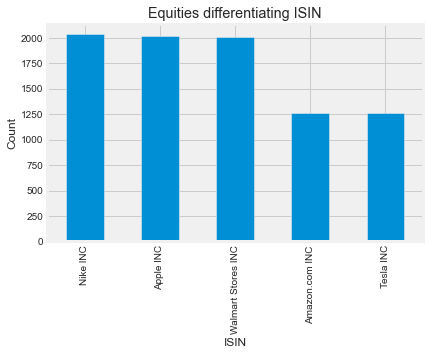

In [127]:
#plot to show equities count per ISIN number
df.Equity.value_counts().plot(kind="bar")
plt.title("Equities differentiating ISIN")
plt.xlabel("ISIN")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [128]:
Eq_ISIN = df.groupby('ISIN').head(1)
Eq_ISIN.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], axis=1)

,Equity,ISIN,SEDOL
0,Apple INC,US0378331005,B0YQ5W0
1259,Amazon.com INC,US0231351067,B0YPX78
2518,Nike INC,US6541061031,BSJC8P3
3777,Tesla INC,US88160R1014,BSJC712
5036,Walmart Stores INC,US9311421039,B11SJG8


In [129]:
#Correlation 

df.corr()

,Open,High,Low,Close,Adj_Close,Volume
Open,1.000000,0.999522,0.999358,0.998880,0.998267,-0.204986
High,0.999522,1.000000,0.999109,0.999420,0.998970,-0.196001
Low,0.999358,0.999109,1.000000,0.999436,0.998623,-0.215653
Close,0.998880,0.999420,0.999436,1.000000,0.999378,-0.205033
Adj_Close,0.998267,0.998970,0.998623,0.999378,1.000000,-0.186777
Volume,-0.204986,-0.196001,-0.215653,-0.205033,-0.186777,1.000000


#To check the boom in the stock prices

In [131]:
fig = go.Figure(data=go.Ohlc(x=df[df['ISIN']=="US0378331005"]['Date'],
                open=df[df['ISIN']=="US0378331005"]['Open'],
                high=df[df['ISIN']=="US0378331005"]['High'],
                low=df[df['ISIN']=="US0378331005"]['Low'],
                close=df[df['ISIN']=="US0378331005"]['Close']))

fig.update_layout(
    title='The BOOM',
    yaxis_title='Apple Stock',
)

fig.show()

In [132]:
fig = go.Figure(data=go.Ohlc(x=df[df['ISIN']=="US0231351067"]['Date'],
                open=df[df['ISIN']=="US0231351067"]['Open'],
                high=df[df['ISIN']=="US0231351067"]['High'],
                low=df[df['ISIN']=="US0231351067"]['Low'],
                close=df[df['ISIN']=="US0231351067"]['Close']))

fig.update_layout(
    title='The BOOM',
    yaxis_title='Amazon Stock',
)

fig.show()

In [133]:
fig = go.Figure(data=go.Ohlc(x=df[df['ISIN']=="US6541061031"]['Date'],
                open=df[df['ISIN']=="US6541061031"]['Open'],
                high=df[df['ISIN']=="US6541061031"]['High'],
                low=df[df['ISIN']=="US6541061031"]['Low'],
                close=df[df['ISIN']=="US6541061031"]['Close']))

fig.update_layout(
    title='The BOOM',
    yaxis_title='Nike Stock',
)

fig.show()

In [134]:
fig = go.Figure(data=go.Ohlc(x=df[df['ISIN']=="US88160R1014"]['Date'],
                open=df[df['ISIN']=="US88160R1014"]['Open'],
                high=df[df['ISIN']=="US88160R1014"]['High'],
                low=df[df['ISIN']=="US88160R1014"]['Low'],
                close=df[df['ISIN']=="US88160R1014"]['Close']))

fig.update_layout(
    title='The BOOM',
    yaxis_title='Tesla Stock',
)

fig.show()

In [135]:
fig = go.Figure(data=go.Ohlc(x=df[df['ISIN']=="US9311421039"]['Date'],
                open=df[df['ISIN']=="US9311421039"]['Open'],
                high=df[df['ISIN']=="US9311421039"]['High'],
                low=df[df['ISIN']=="US9311421039"]['Low'],
                close=df[df['ISIN']=="US9311421039"]['Close']))

fig.update_layout(
    title='The BOOM',
    yaxis_title='Walmart Stock',
)

fig.show()

In [136]:
#Setting up the ticker, yf_period and yf_interval
#  ticker - securities to download
ticker      = ["AMZN", "AAPL", "NKE", "WMT", 'TSLA']

#Setting the market indexes to compare equities with
market_index = ['^DJI', '^IXIC', '^GSPC']  
#Dow Jones, Nasdaq and S&P500

#  time period and interval
yf_period   = "5y"   # 1d,5d,1mo,3mo,6mo,1y,2y,5y max
yf_interval = "1d"    # 1m,2m,5m,15m,30m,60m,90m,1h,1d

#  print set parameters
print('TICKER:\t\t{}'.format(ticker))
print('MARKET INDEX:\t{}'.format(market_index))
print('PERIOD:\t\t{}'.format(yf_period))
print('INTERVAL:\t{}'.format(yf_interval))

TICKER:		['AMZN', 'AAPL', 'NKE', 'WMT', 'TSLA']
MARKET INDEX:	['^DJI', '^IXIC', '^GSPC']
PERIOD:		5y
INTERVAL:	1d


In [137]:
symbols = []   # initialize list
symbols = ticker

In [138]:
pending_info = ["shortName", "industry", "quoteType", "exchange", "low", "high", "close", "volume", "averageVolume", "fiftyTwoWeekLow", "fiftyTwoWeekHigh", "dividendRate"]

#  creating a dataframe with pending information
info = pd.DataFrame(index = pending_info, columns = symbols)

for i in symbols:
    l = []             # initializing
    x = yf.Ticker(i)   # getting ticker info
    for j in pending_info:
        if 'date' in j.lower():
            d = pd.to_datetime(x.info[j])
            if d is not None:
                l.append(d.strftime("%Y-%m-%d"))  # format date
        else:
            try:      # some parameters error
                l.append(x.info[j])
            except:   # ignore error and continue
                l.append("")
    info[i] = l
    print('{}\t- financial information downloaded'.format(i))


info

AMZN	- financial information downloaded
AAPL	- financial information downloaded
NKE	- financial information downloaded
WMT	- financial information downloaded
TSLA	- financial information downloaded


,AMZN,AAPL,NKE,WMT,TSLA
shortName,"Amazon.com, Inc.",Apple Inc.,"Nike, Inc.",Walmart Inc.,"Tesla, Inc."
industry,Internet Retail,Consumer Electronics,Footwear & Accessories,Discount Stores,Auto Manufacturers
quoteType,EQUITY,EQUITY,EQUITY,EQUITY,EQUITY
exchange,NMS,NMS,NYQ,NYQ,NMS
low,,,,,
high,,,,,
close,,,,,
volume,41192783,38097795,2819382,4039732,38940177
averageVolume,70587582,89576498,8774479,6460142,73481403
fiftyTwoWeekLow,85.87,129.04,82.22,117.27,177.12


In [139]:
# Creating the dataframe in respect to yf_price 
yf_returns = yf.download(
        tickers = symbols,       
        period = yf_period,      
        interval = yf_interval,  
        group_by = 'ticker',     
        auto_adjust = True,      
        prepost = True,          
        threads = True,         
        proxy = None)            


# Selecting 'Close' (price at market close) column only
yf_returns = yf_returns.iloc[:, yf_returns.columns.get_level_values(1)=='Close']


#Removing the dataframe multi-index
yf_returns.columns = yf_returns.columns.droplevel(1)  # multi-index


yf_returns.tail(10000)

[*********************100%***********************]  5 of 5 completed


,AMZN,TSLA,AAPL,WMT,NKE
Date,,,,,
2017-11-17,56.493999,21.003332,40.448891,88.820084,56.321167
2017-11-20,56.315498,20.582666,40.408482,88.829201,56.378254
2017-11-21,56.974499,21.187332,41.159695,87.954391,56.511482
2017-11-22,57.807999,20.840000,41.592365,87.854164,56.206985
2017-11-24,59.299999,21.036667,41.594727,88.045532,56.444866
...,...,...,...,...,...
2022-11-11,100.790001,195.970001,149.699997,142.580002,106.089996
2022-11-14,98.489998,190.949997,148.279999,138.389999,104.389999
2022-11-15,98.940002,194.419998,150.039993,147.440002,106.709999


In [140]:
print('shape: ', yf_returns.shape)

shape:  (1259, 5)


In [141]:
#calculating the percentage changes with respect to "pct_change()"
yf_returns = round(yf_returns.pct_change()*100, 2)
yf_returns.tail(10)

,AMZN,TSLA,AAPL,WMT,NKE
Date,,,,,
2022-11-04,1.88,-3.64,-0.19,0.18,5.96
2022-11-07,-0.49,-5.01,0.39,1.05,-2.45
2022-11-08,-0.61,-2.93,0.42,0.24,0.33
2022-11-09,-4.27,-7.17,-3.32,-2.33,-1.76
2022-11-10,12.18,7.39,8.90,2.07,8.02
2022-11-11,4.31,2.75,1.93,0.15,6.63
2022-11-14,-2.28,-2.56,-0.95,-2.94,-1.60
2022-11-15,0.46,1.82,1.19,6.54,2.22
2022-11-16,-1.84,-3.86,-0.83,0.72,-1.39


In [142]:
market_index = ['^DJI', '^IXIC', '^GSPC']
#removing markets from ticker for plots, returns
for market in market_index:
    if market in ticker:
        ticker.remove(market)
        
divdend = pd.DataFrame() 

for i in ticker:
    if i != market_index:
        x = pd.DataFrame(yf.Ticker(i).dividends)
        x = x.rename(columns={"Dividends":i})
        divdend = pd.concat([divdend,x], axis=1)
        if len(x) > 0:
            print('{:>8}\t- dividends'.format(i))
        else:
            print('{:>8}\t- no dividends'.format(i))             

print("\n",divdend.tail(10))

    AMZN	- no dividends
    AAPL	- dividends
     NKE	- dividends
     WMT	- dividends
    TSLA	- no dividends

             AMZN  AAPL    NKE   WMT  TSLA
Date                                     
2022-02-04   NaN  0.22    NaN   NaN   NaN
2022-03-04   NaN   NaN  0.305   NaN   NaN
2022-03-17   NaN   NaN    NaN  0.56   NaN
2022-05-05   NaN   NaN    NaN  0.56   NaN
2022-05-06   NaN  0.23    NaN   NaN   NaN
2022-06-03   NaN   NaN  0.305   NaN   NaN
2022-08-05   NaN  0.23    NaN   NaN   NaN
2022-08-11   NaN   NaN    NaN  0.56   NaN
2022-09-02   NaN   NaN  0.305   NaN   NaN
2022-11-04   NaN  0.23    NaN   NaN   NaN


In [143]:
#Creating YEAR, MONTH, WEEK columns in perf_dy
perf_dy = yf_returns
perf_dy['YEAR']  = perf_dy.index.strftime("%Y")     # YEAR
perf_dy['MONTH'] = perf_dy.index.strftime("%Y-%m")  # YEAR-MONTH
perf_dy['WEEK']  = perf_dy.index.strftime("%Y-%U")  # YEAR-WEEK


#Creating time dataframes using GROUPBY
perf_yr = perf_dy.groupby('YEAR').sum()
perf_mh = perf_dy.groupby('MONTH').sum()
perf_wk = perf_dy.groupby('WEEK').sum()


#Printing index and column names
print("\nperf_dy:\n", perf_dy.index.name, perf_dy.columns.values)
print("\nperf_yr:\n", perf_yr.index.name, perf_yr.columns.values)
print("\nperf_mh:\n", perf_mh.index.name, perf_mh.columns.values)
print("\nperf_wk:\n", perf_wk.index.name, perf_wk.columns.values)


perf_dy:
 Date ['AMZN' 'TSLA' 'AAPL' 'WMT' 'NKE' 'YEAR' 'MONTH' 'WEEK']

perf_yr:
 YEAR ['AMZN' 'TSLA' 'AAPL' 'WMT' 'NKE']

perf_mh:
 MONTH ['AMZN' 'TSLA' 'AAPL' 'WMT' 'NKE']

perf_wk:
 WEEK ['AMZN' 'TSLA' 'AAPL' 'WMT' 'NKE']


In [144]:
#creating function to plot market and indexes
def plotPerformance(arg):
    df = arg
    
    plt.figure(figsize=(10,8))
    
    #  plot 1
    plt.figure(figsize=(10,6))
    df[ticker].boxplot()
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.xticks(rotation = 90)
    plt.grid(False)
    plt.show()
    
    #  plot 2
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
    

    #  print returns
    print('\nRETURNS FROM {} TO {}:'.format(df.index[0], df.index[-1]))
    for i in ticker:
        print('{:>10}{:>10.2f}%'.format(i,df[i].sum()))

    return

print('function plotPerformance created')

function plotPerformance created


<Figure size 720x576 with 0 Axes>

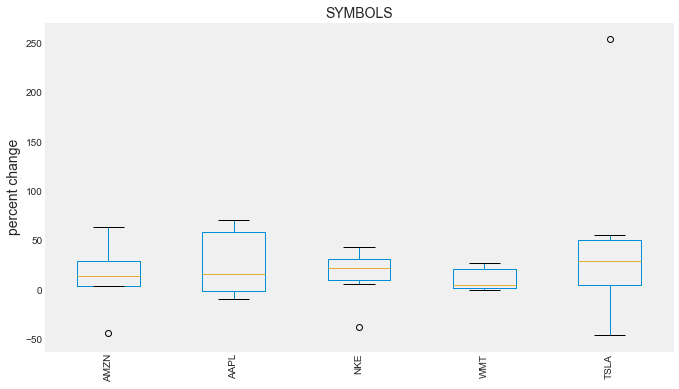

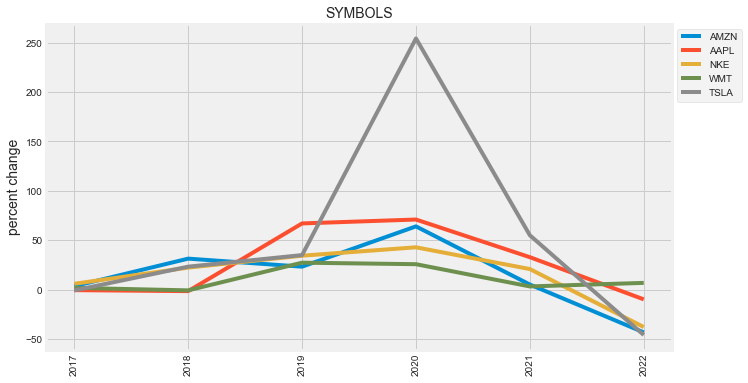


RETURNS FROM 2017 TO 2022:
      AMZN     84.68%
      AAPL    159.54%
       NKE     89.02%
       WMT     64.82%
      TSLA    321.28%


In [145]:
plotPerformance(perf_yr.tail(10))  # past 10 years

<Figure size 720x576 with 0 Axes>

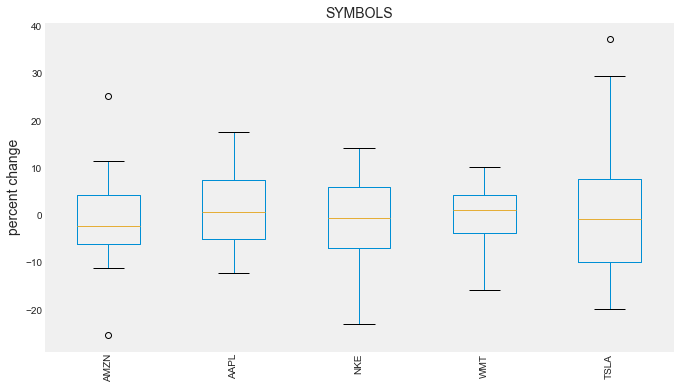

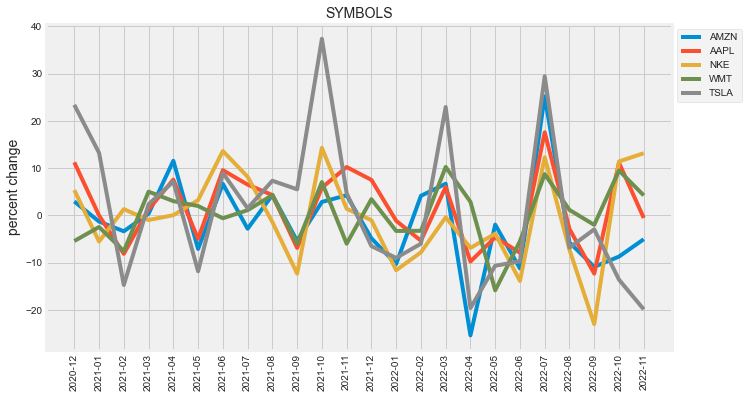


RETURNS FROM 2020-12 TO 2022-11:
      AMZN    -34.90%
      AAPL     34.44%
       NKE    -11.44%
       WMT      4.90%
      TSLA     32.76%


In [146]:
plotPerformance(perf_mh.tail(24))  # past 24 months

<Figure size 720x576 with 0 Axes>

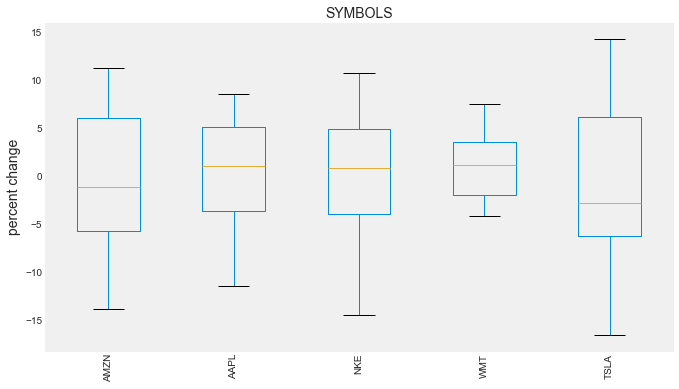

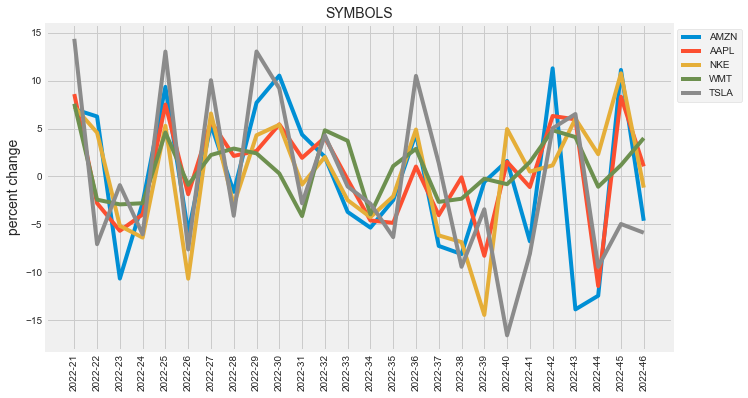


RETURNS FROM 2022-21 TO 2022-46:
      AMZN     -4.95%
      AAPL     13.18%
       NKE      2.54%
       WMT     23.90%
      TSLA     -9.27%


In [147]:
plotPerformance(perf_wk.tail(26))

<Figure size 720x576 with 0 Axes>

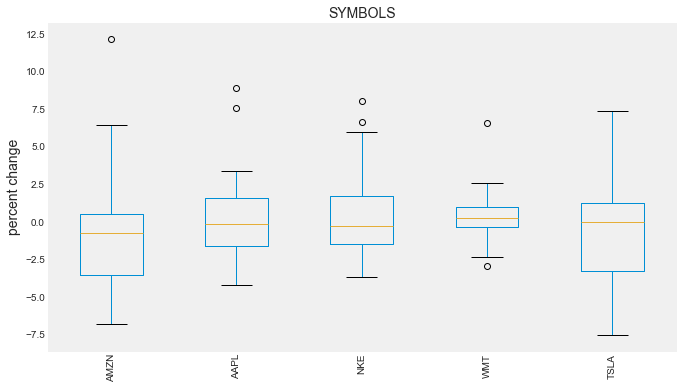

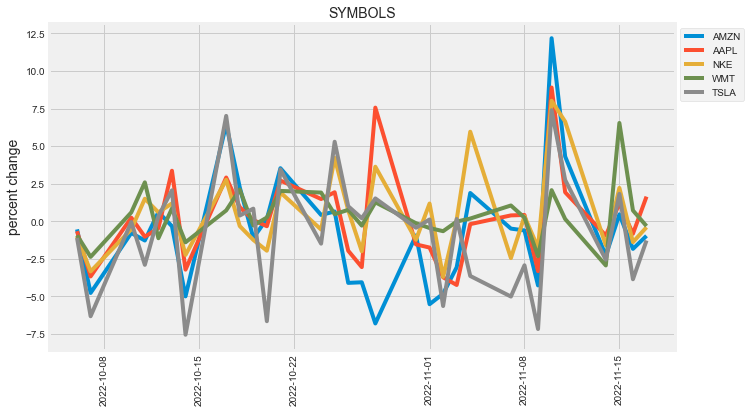


RETURNS FROM 2022-10-06 00:00:00 TO 2022-11-17 00:00:00:
      AMZN    -20.66%
      AAPL      4.75%
       NKE     15.25%
       WMT     11.23%
      TSLA    -24.27%


In [148]:
plotPerformance(perf_dy.tail(31))

Defining and bifurcating data set basis the identified ISINs

In [149]:
#As per ISIN number -
df_apple = df[df['ISIN']=="US0378331005"]
df_amazon = df[df['ISIN']=="US0231351067"]
df_nike = df[df['ISIN']=="US6541061031"]
df_tesla = df[df['ISIN']=="US88160R1014"]
df_walmart = df[df['ISIN']=="US9311421039"]

LSTM for Apple INC Stock

In [150]:
cl_apple = df_apple.Close

In [151]:
scl = MinMaxScaler()
#Scale the data
cl_apple = cl_apple.values.reshape(cl_apple.shape[0],1)
cl_apple = scl.fit_transform(cl_apple)
cl_apple

array([[0.04187078],
       [0.04583083],
       [0.04216096],
       ...,
       [0.83579422],
       [0.89082535],
       [0.7395238 ]])

In [155]:
def processData(df_apple,lb):
    X,Y = [],[]
    for i in range(len(df_apple)-lb-1):
        X.append(df_apple[i:(i+lb),0])
        Y.append(df_apple[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl_apple,7)
X_train_apple,X_test_apple = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train_apple,y_test_apple = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train_apple.shape[0])
print(X_test_apple.shape[0])
print(y_train_apple.shape[0])
print(y_test_apple.shape[0])

1604
401
1604
401


In [157]:
#Build the model
model = Sequential()
model.add(LSTM(32,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for Sample,Timestep and features
X_train_apple = X_train_apple.reshape((X_train_apple.shape[0],X_train_apple.shape[1],1))
X_test_apple = X_test_apple.reshape((X_test_apple.shape[0],X_test_apple.shape[1],1))
#Fit model with history to check for overfitting and set epoches
history = model.fit(X_train_apple,y_train_apple,epochs=30,validation_data=(X_test_apple,y_test_apple),shuffle=False)

Epoch 1/30
51/51 [==============================] - 4s 21ms/step - loss: 0.0146 - val_loss: 0.0242
Epoch 2/30
51/51 [==============================] - 0s 7ms/step - loss: 0.0198 - val_loss: 0.0086
Epoch 3/30
51/51 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 4/30
51/51 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 5/30
51/51 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0044
Epoch 6/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0022 - val_loss: 0.0057
Epoch 7/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 0.0068
Epoch 8/30
51/51 [==============================] - 0s 7ms/step - loss: 0.0029 - val_loss: 0.0071
Epoch 9/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0065
Epoch 10/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 11/30
51/51 

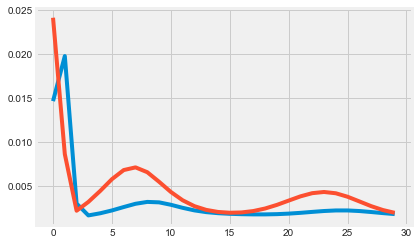

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [159]:
X_test_apple[0]

array([[0.11359563],
       [0.10840658],
       [0.12134505],
       [0.12131091],
       [0.12286421],
       [0.12718272],
       [0.13808995]])

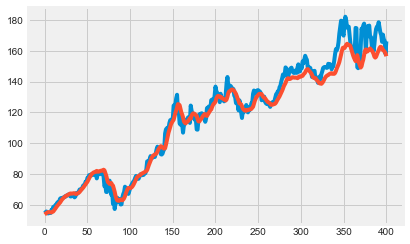

In [161]:
Xt_apple = model.predict(X_test_apple)
plt.plot(scl.inverse_transform(y_test_apple.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_apple))

In [163]:
act = []
pred = []
#for i in range(401):
i=400
Xt_apple = model.predict(X_test_apple[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt_apple),scl.inverse_transform(y_test_apple[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt_apple))
act.append(scl.inverse_transform(y_test_apple[i].reshape(-1,1)))

predicted:[[156.38548]], actual:[[166.020004]]


In [164]:
import pandas as pd
result_df_apple = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

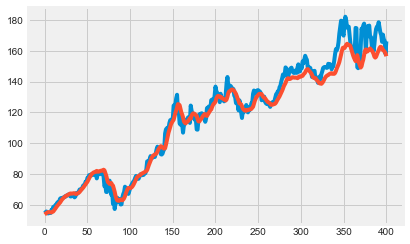

In [165]:
Xt_apple = model.predict(X_test_apple)
plt.plot(scl.inverse_transform(y_test_apple.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_apple))

In [166]:
X_test_apple[400]

array([[0.9304942 ],
       [0.91861398],
       [0.88898185],
       [0.92073055],
       [0.90024749],
       [0.89355639],
       [0.83579422]])

In [167]:
X_test_apple[399]

array([[0.9525476 ],
       [0.9304942 ],
       [0.91861398],
       [0.88898185],
       [0.92073055],
       [0.90024749],
       [0.89355639]])

----------LSTM for Amazon INC Stock----------

In [168]:
cl_amazon = df_amazon.Close

In [169]:
scl = MinMaxScaler()
#Scale the data
cl_amazon = cl_amazon.values.reshape(cl_amazon.shape[0],1)
cl_amazon = scl.fit_transform(cl_amazon)
cl_amazon

array([[0.00630596],
       [0.00419387],
       [0.00358714],
       ...,
       [0.36932497],
       [0.00255197],
       [0.4577524 ]])

In [170]:
def processData(df_amazon,lb):
    X,Y = [],[]
    for i in range(len(df_amazon)-lb-1):
        X.append(df_amazon[i:(i+lb),0])
        Y.append(df_amazon[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl_amazon,7)
X_train_amazon,X_test_amazon = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train_amazon,y_test_amazon = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train_amazon.shape[0])
print(X_test_amazon.shape[0])
print(y_train_amazon.shape[0])
print(y_test_amazon.shape[0])

1002
251
1002
251


In [171]:
#Build the model
model = Sequential()
model.add(LSTM(32,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for Sample,Timestep and features
X_train_amazon = X_train_amazon.reshape((X_train_amazon.shape[0],X_train_amazon.shape[1],1))
X_test_amazon = X_test_amazon.reshape((X_test_amazon.shape[0],X_test_amazon.shape[1],1))
#Fit model with history to check for overfitting and set epoches
history = model.fit(X_train_amazon,y_train_amazon,epochs=30,validation_data=(X_test_amazon,y_test_amazon),shuffle=False)

Epoch 1/30
32/32 [==============================] - 4s 29ms/step - loss: 0.0270 - val_loss: 0.0296
Epoch 2/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0262 - val_loss: 0.0045
Epoch 3/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 4/30
32/32 [==============================] - 0s 8ms/step - loss: 9.9791e-04 - val_loss: 0.0037
Epoch 5/30
32/32 [==============================] - 0s 7ms/step - loss: 9.6527e-04 - val_loss: 0.0037
Epoch 6/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0039
Epoch 7/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 8/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 9/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 10/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 11/3

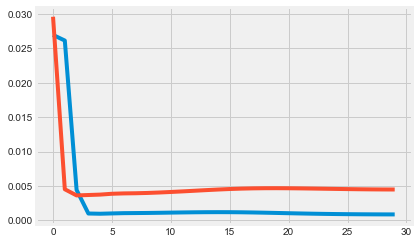

In [172]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [173]:
X_test_amazon[0]

array([[0.84989325],
       [0.84413711],
       [0.8652581 ],
       [0.87148442],
       [0.89199117],
       [0.86387791],
       [0.8432802 ]])

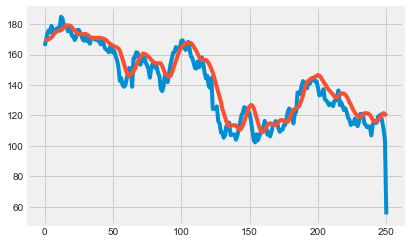

In [174]:
Xt_amazon = model.predict(X_test_amazon)
plt.plot(scl.inverse_transform(y_test_amazon.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_amazon))

In [175]:
act = []
pred = []
#for i in range(251):
i=250
Xt_amazon = model.predict(X_test_amazon[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt_amazon),scl.inverse_transform(y_test_amazon[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt_amazon))
act.append(scl.inverse_transform(y_test_amazon[i].reshape(-1,1)))

predicted:[[119.561554]], actual:[[55.047501]]


In [176]:
result_df_amazon = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

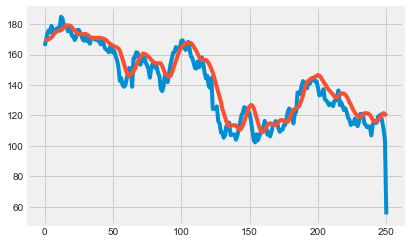

In [177]:
Xt_amazon = model.predict(X_test_amazon)
plt.plot(scl.inverse_transform(y_test_amazon.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_amazon))

In [179]:
X_test_amazon[249]

array([[0.4577524 ],
       [0.45911749],
       [0.48998368],
       [0.49377559],
       [0.49969096],
       [0.46222689],
       [0.42658285]])

In [180]:
X_test_amazon[248]

array([[0.46753555],
       [0.4577524 ],
       [0.45911749],
       [0.48998368],
       [0.49377559],
       [0.49969096],
       [0.46222689]])

----------LSTM for Nike INC Stock----------

In [181]:
cl_nike = df_nike.Close

In [182]:
scl = MinMaxScaler()
#Scale the data
cl_nike = cl_nike.values.reshape(cl_nike.shape[0],1)
cl_nike = scl.fit_transform(cl_nike)
cl_nike

array([[0.00228532],
       [0.        ],
       [0.00065294],
       ...,
       [0.49787789],
       [0.55843949],
       [0.2740777 ]])

In [183]:
def processData(df_nike,lb):
    X,Y = [],[]
    for i in range(len(df_nike)-lb-1):
        X.append(df_nike[i:(i+lb),0])
        Y.append(df_nike[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl_nike,7)
X_train_nike,X_test_nike = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train_nike,y_test_nike = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train_nike.shape[0])
print(X_test_nike.shape[0])
print(y_train_nike.shape[0])
print(y_test_nike.shape[0])

1620
406
1620
406


In [184]:
#Build the model
model = Sequential()
model.add(LSTM(32,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for Sample,Timestep and features
X_train_nike = X_train_nike.reshape((X_train_nike.shape[0],X_train_nike.shape[1],1))
X_test_nike = X_test_nike.reshape((X_test_nike.shape[0],X_test_nike.shape[1],1))
#Fit model with history to check for overfitting and set epoches
history = model.fit(X_train_nike,y_train_nike,epochs=30,validation_data=(X_test_nike,y_test_nike),shuffle=False)

Epoch 1/30
51/51 [==============================] - 4s 21ms/step - loss: 0.0289 - val_loss: 0.0153
Epoch 2/30
51/51 [==============================] - 0s 7ms/step - loss: 0.0180 - val_loss: 0.0075
Epoch 3/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 4/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 5/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 6/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 0.0073
Epoch 7/30
51/51 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0088
Epoch 8/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 0.0104
Epoch 9/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0117
Epoch 10/30
51/51 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0126
Epoch 11/30
51/51 

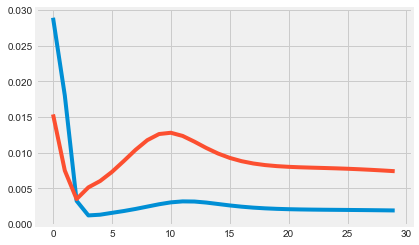

In [185]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [186]:
X_test_nike[0]

array([[0.26689522],
       [0.26273261],
       [0.29236042],
       [0.30346064],
       [0.30460331],
       [0.30435846],
       [0.29791053]])

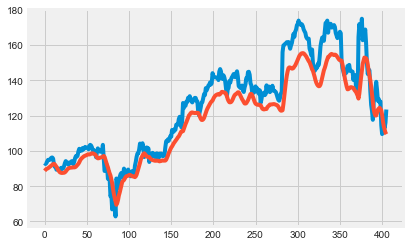

In [187]:
Xt_nike = model.predict(X_test_nike)
plt.plot(scl.inverse_transform(y_test_nike.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_nike))

In [188]:
act = []
pred = []
#for i in range(406):
i=405
Xt_nike = model.predict(X_test_nike[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt_nike),scl.inverse_transform(y_test_nike[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt_nike))
act.append(scl.inverse_transform(y_test_nike[i].reshape(-1,1)))

predicted:[[109.40445]], actual:[[123.410004]]


In [189]:
result_df_nike = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

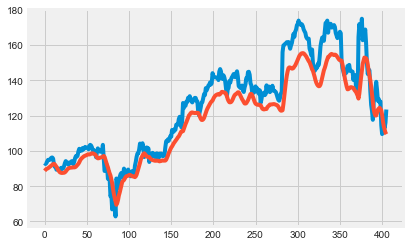

In [190]:
Xt_nike = model.predict(X_test_nike)
plt.plot(scl.inverse_transform(y_test_nike.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_nike))

In [191]:
X_test_nike[404]

array([[0.59174013],
       [0.59541303],
       [0.48563499],
       [0.44482533],
       [0.47020894],
       [0.49714335],
       [0.47298403]])

In [192]:
X_test_nike[403]

array([[0.60716624],
       [0.59174013],
       [0.59541303],
       [0.48563499],
       [0.44482533],
       [0.47020894],
       [0.49714335]])

---------- LSTM for Tesla INC Stock ----------

In [193]:
cl_tesla = df_tesla.Close

In [194]:
scl = MinMaxScaler()
#Scale the data
cl_tesla = cl_tesla.values.reshape(cl_tesla.shape[0],1)
cl_tesla = scl.fit_transform(cl_tesla)
cl_tesla

array([[0.02363422],
       [0.02555195],
       [0.02380171],
       ...,
       [0.54413977],
       [0.02376654],
       [0.52785992]])

In [195]:
def processData(df_tesla,lb):
    X,Y = [],[]
    for i in range(len(df_tesla)-lb-1):
        X.append(df_tesla[i:(i+lb),0])
        Y.append(df_tesla[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl_tesla,7)
X_train_tesla,X_test_tesla = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train_tesla,y_test_tesla = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train_tesla.shape[0])
print(X_test_tesla.shape[0])
print(y_train_tesla.shape[0])
print(y_test_tesla.shape[0])

1002
251
1002
251


In [196]:
#Build the model
model = Sequential()
model.add(LSTM(32,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for Sample,Timestep and features
X_train_tesla = X_train_tesla.reshape((X_train_tesla.shape[0],X_train_tesla.shape[1],1))
X_test_tesla = X_test_tesla.reshape((X_test_tesla.shape[0],X_test_tesla.shape[1],1))
#Fit model with history to check for overfitting and set epoches
history = model.fit(X_train_tesla,y_train_tesla,epochs=30,validation_data=(X_test_tesla,y_test_tesla),shuffle=False)

Epoch 1/30
32/32 [==============================] - 4s 30ms/step - loss: 0.0430 - val_loss: 0.1364
Epoch 2/30
32/32 [==============================] - 0s 8ms/step - loss: 0.0121 - val_loss: 0.0125
Epoch 3/30
32/32 [==============================] - 0s 9ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 4/30
32/32 [==============================] - 0s 9ms/step - loss: 9.0584e-04 - val_loss: 0.0050
Epoch 5/30
32/32 [==============================] - 0s 8ms/step - loss: 5.5894e-04 - val_loss: 0.0054
Epoch 6/30
32/32 [==============================] - 0s 9ms/step - loss: 6.1087e-04 - val_loss: 0.0048
Epoch 7/30
32/32 [==============================] - 0s 8ms/step - loss: 5.3695e-04 - val_loss: 0.0051
Epoch 8/30
32/32 [==============================] - 0s 8ms/step - loss: 5.8144e-04 - val_loss: 0.0048
Epoch 9/30
32/32 [==============================] - 0s 8ms/step - loss: 5.5193e-04 - val_loss: 0.0048
Epoch 10/30
32/32 [==============================] - 0s 8ms/step - loss: 5.6696e-04 - val_los

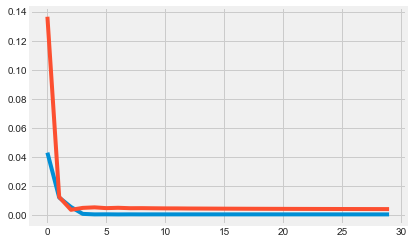

In [197]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [198]:
X_test_tesla[0]

array([[0.73182669],
       [0.828283  ],
       [0.82289824],
       [0.83916974],
       [0.87198062],
       [0.9029324 ],
       [0.98214581]])

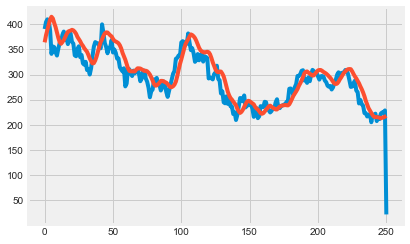

In [199]:
Xt_tesla = model.predict(X_test_tesla)
plt.plot(scl.inverse_transform(y_test_tesla.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_tesla))

In [200]:
act = []
pred = []
#for i in range(251):
i=250
Xt_tesla = model.predict(X_test_tesla[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt_tesla),scl.inverse_transform(y_test_tesla[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt_tesla))
act.append(scl.inverse_transform(y_test_tesla[i].reshape(-1,1)))

predicted:[[217.83553]], actual:[[21.391333]]


In [201]:
result_df_tesla = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

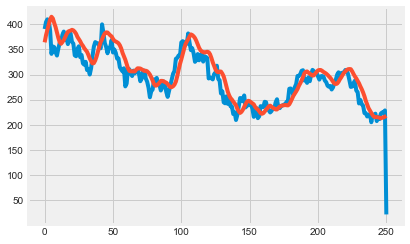

In [202]:
Xt_tesla = model.predict(X_test_tesla)
plt.plot(scl.inverse_transform(y_test_tesla.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_tesla))

In [203]:
X_test_tesla[249]

array([[0.52785992],
       [0.49077811],
       [0.50876632],
       [0.50075202],
       [0.52881462],
       [0.53439197],
       [0.5355225 ]])

In [204]:
X_test_tesla[248]

array([[0.52321215],
       [0.52785992],
       [0.49077811],
       [0.50876632],
       [0.50075202],
       [0.52881462],
       [0.53439197]])

---------- LSTM for Walmart Stores INC Stock ----------

In [205]:
cl_walmart = df_walmart.Close

In [206]:
scl = MinMaxScaler()
#Scale the data
cl_walmart = cl_walmart.values.reshape(cl_walmart.shape[0],1)
cl_walmart = scl.fit_transform(cl_walmart)
cl_walmart

array([[0.05873235],
       [0.06337933],
       [0.07151156],
       ...,
       [0.75164591],
       [0.73060544],
       [0.66296628]])

In [207]:
def processData(df_walmart,lb):
    X,Y = [],[]
    for i in range(len(df_walmart)-lb-1):
        X.append(df_walmart[i:(i+lb),0])
        Y.append(df_walmart[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl_walmart,7)
X_train_walmart,X_test_walmart = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train_walmart,y_test_walmart = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train_walmart.shape[0])
print(X_test_walmart.shape[0])
print(y_train_walmart.shape[0])
print(y_test_walmart.shape[0])

1600
401
1600
401


In [208]:
#Build the model
model = Sequential()
model.add(LSTM(32,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for Sample,Timestep and features
X_train_walmart = X_train_walmart.reshape((X_train_walmart.shape[0],X_train_walmart.shape[1],1))
X_test_walmart = X_test_walmart.reshape((X_test_walmart.shape[0],X_test_walmart.shape[1],1))
#Fit model with history to check for overfitting and set epoches
history = model.fit(X_train_walmart,y_train_walmart,epochs=30,validation_data=(X_test_walmart,y_test_walmart),shuffle=False)

Epoch 1/30
50/50 [==============================] - 4s 21ms/step - loss: 0.0089 - val_loss: 0.0344
Epoch 2/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.0292
Epoch 3/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0108 - val_loss: 0.0150
Epoch 4/30
50/50 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0086
Epoch 5/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0059 - val_loss: 0.0066
Epoch 6/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0042 - val_loss: 0.0062
Epoch 7/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 8/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 0.0063
Epoch 9/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0066
Epoch 10/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 0.0069
Epoch 11/30
50/50 

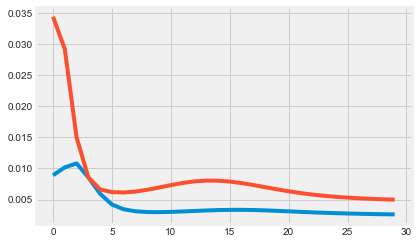

In [209]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [210]:
X_test_walmart[0]

array([[0.34826381],
       [0.34852204],
       [0.30231057],
       [0.33303211],
       [0.33716274],
       [0.32115657],
       [0.29456565]])

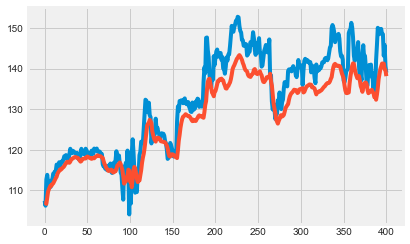

In [211]:
Xt_walmart = model.predict(X_test_walmart)
plt.plot(scl.inverse_transform(y_test_walmart.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_walmart))

In [212]:
act = []
pred = []
#for i in range(401):
i=400
Xt_walmart = model.predict(X_test_walmart[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt_walmart),scl.inverse_transform(y_test_walmart[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt_walmart))
act.append(scl.inverse_transform(y_test_walmart[i].reshape(-1,1)))

predicted:[[138.13771]], actual:[[139.]]


In [213]:
result_df_walmart = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

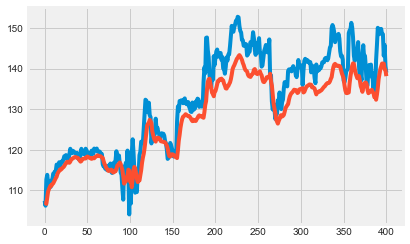

In [214]:
Xt_walmart = model.predict(X_test_walmart)
plt.plot(scl.inverse_transform(y_test_walmart.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt_walmart))

In [215]:
X_test_walmart[399]

array([[0.86988508],
       [0.86317294],
       [0.86988508],
       [0.85245909],
       [0.85323356],
       [0.7843037 ],
       [0.81851041]])

In [216]:
X_test_walmart[398]

array([[0.85258811],
       [0.86988508],
       [0.86317294],
       [0.86988508],
       [0.85245909],
       [0.85323356],
       [0.7843037 ]])